In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from quantbullet.preprocessing.transformers import FlatRampTransformer
from quantbullet.dfutils import get_bins_and_labels

## Single Feature Classification Problem

In [13]:
np.random.seed(42)
n_samples = 1_000_000
x1 = np.random.uniform(0, 4, n_samples)
y = ( x1 - 2 ) ** 2 + np.random.normal(0, 1, n_samples) + 10
df = pd.DataFrame({'x1': x1, 'y': y})

In [14]:
x1_trans = FlatRampTransformer(
    knots = [0.5, 1, 2, 3, 3.5],
    include_bias=True
)

train_df = np.concatenate([
    x1_trans.fit_transform(df['x1']),
], axis=1)

train_df = pd.DataFrame(train_df, columns = x1_trans.get_feature_names_out().tolist() )

In [15]:
x1_bins, x1_labels = get_bins_and_labels(cutoffs=np.arange(0.2, 4, 0.2))
df['x1_bins'] = pd.cut( df['x1'], bins=x1_bins, labels=x1_labels )

In [16]:
feature_groups = {'x1': x1_trans.get_feature_names_out().tolist()}

In [17]:
probs = 1 / (1 + np.exp(-(df['y'] - 16)))
df['binary_y'] = np.random.binomial(1, probs)
print(df['binary_y'].mean())

0.028057


In [18]:
from quantbullet.optimizer import LinearProductClassifierScipy

lpc_scipy = LinearProductClassifierScipy(ftol=1e-8, gtol=1e-8, eps=1e-3)

In [19]:
lpc_scipy.fit( train_df, df['binary_y'], feature_groups=feature_groups )

Using initial params: {'x1': array([0.00086681, 0.00040644, 0.00078578, 0.00140893, 0.002059  ,
       0.00268176, 0.003061  ])}
Iter 1: 120524.46458936627
Iter 2: 120394.94039531187
Iter 3: 120328.09485998013
Iter 4: 119893.08709800577
Iter 5: 117957.18912215001
Iter 6: 117111.70122942084
Iter 7: 116520.30543006049
Iter 8: 116274.73881631903
Iter 9: 116039.34895951979
Iter 10: 115951.52816318153
Iter 11: 115901.4445828731
Iter 12: 115886.33355960368
Iter 13: 115822.9787789267
Iter 14: 115579.84706252323
Iter 15: 114720.30509013974
Iter 16: 114709.7019623112
Iter 17: 114250.0040459578
Iter 18: 113821.55633725581
Iter 19: 113745.86794031177
Iter 20: 113588.76660774264
Iter 21: 113572.81591760824
Iter 22: 113540.8629614545
Iter 23: 113457.92829630687
Iter 24: 113266.08310515208
Iter 25: 113191.35377829868
Iter 26: 112729.01720090093
Iter 27: 112366.62401874519
Iter 28: 112362.22172012969
Iter 29: 112297.63141339939
Iter 30: 112276.4257038761
Iter 31: 112272.71360380959
Iter 32: 112270.97

In [20]:
lpc_scipy.coef_

array([-0.67337066, -0.20981811, -0.04111738, -0.00559159,  0.00595216,
        0.04255744,  0.1983336 ])

In [21]:
df['clf_scipy_pred_prob'] = lpc_scipy.predict(train_df)

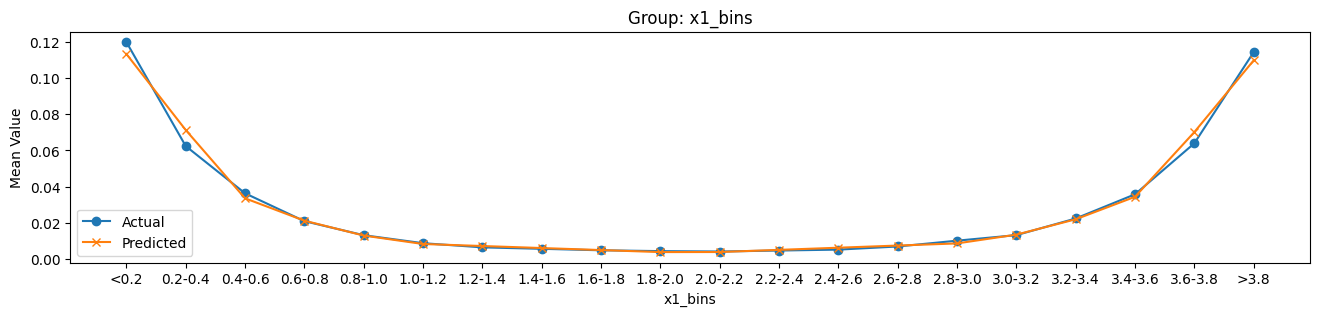

In [22]:
for group in ['x1_bins']:
    plt.figure(figsize=(16, 3))
    summary = df.groupby(group, observed=True).agg({'binary_y': 'mean', 'clf_scipy_pred_prob': 'mean'})
    plt.plot(summary.index, summary['binary_y'], label='Actual', marker='o')
    plt.plot(summary.index, summary['clf_scipy_pred_prob'], label='Predicted', marker='x')
    plt.title(f'Group: {group}')
    plt.xlabel(group)
    plt.ylabel('Mean Value')
    plt.legend()